In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import sklearn
np.set_printoptions(suppress= True) #decimal formatting

In [12]:
users_train = pd.read_csv("training_users_list.csv")
users_test = pd.read_csv("testing_users_list.csv")

Try without dummy variables to get a more simplified model

In [13]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train_no_dummies = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                                      'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_train_no_dummies = X_train_no_dummies.drop(['stats_episodes'], axis=1)
# drop feature column
X_train_no_dummies = X_train_no_dummies.drop(['user_days_spent_watching'], axis=1)
# drop categorical 
X_train_no_dummies = X_train_no_dummies.drop(['gender', 'location'], axis=1)
# fill na values with their average value in the column
X_train_no_dummies = X_train_no_dummies.fillna(X_train_no_dummies.mean())


y_train_no_dummies = users_train.user_days_spent_watching

In [14]:
no_dummies_model = sm.OLS(y_train_no_dummies, X_train_no_dummies).fit()
w_no_dummies = no_dummies_model.params
print(w_no_dummies)

stats_mean_score   -4.293553
join_year          -7.770052
age                -0.189627
year_last_online    7.799645
dtype: float64


In [15]:
print(no_dummies_model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     user_days_spent_watching   R-squared (uncentered):                   0.598
Model:                                  OLS   Adj. R-squared (uncentered):              0.598
Method:                       Least Squares   F-statistic:                              5644.
Date:                      Sat, 30 Oct 2021   Prob (F-statistic):                        0.00
Time:                              16:13:14   Log-Likelihood:                         -80660.
No. Observations:                     15204   AIC:                                  1.613e+05
Df Residuals:                         15200   BIC:                                  1.614e+05
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
                       coef    std err          t      P>|t|

In [16]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or 
X_test_no_dummies = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank', 
                                    'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_test_no_dummies = X_test_no_dummies.drop(['stats_episodes'], axis=1)
# drop feature column
X_test_no_dummies = X_test_no_dummies.drop(['user_days_spent_watching'], axis=1)
# drop categorical 
X_test_no_dummies = X_test_no_dummies.drop(['gender', 'location'], axis=1)
# fill na values with their average value in the column 
X_test_no_dummies = X_test_no_dummies.fillna(X_test_no_dummies.mean())

y_test_no_dummies = users_test.user_days_spent_watching

In [17]:
y_pred_no_dummies = no_dummies_model.predict(X_test_no_dummies)
print('The MSE of our simplified model is', sklearn.metrics.mean_squared_error(y_test_no_dummies, y_pred_no_dummies))

The MSE of our simplified model is 2217.039650478535


Now try creating dummy variables so we don't lose the power of our categorical variables. 

In [18]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                           'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_train = X_train.drop(['stats_episodes'], axis=1)
# drop feature column
X_train = X_train.drop(['user_days_spent_watching'], axis=1)
# create dummies
X_train = pd.get_dummies(X_train)
# fill na values with their average value in the column
X_train = X_train.fillna(X_train.mean())


y_train = users_train.user_days_spent_watching

In [19]:
model = sm.OLS(y_train, X_train).fit()
w = model.params
print(w)

stats_mean_score       -3.443107
join_year              -4.849010
age                     0.748037
year_last_online        8.644234
gender_Female       -7198.857877
gender_Male         -7183.345909
gender_Non-Binary   -7194.897599
location_AK          -411.190912
location_AL          -425.077086
location_AR          -423.735234
location_AZ          -424.760112
location_CA          -418.324449
location_CO          -424.874551
location_CT          -418.441841
location_DC          -409.968635
location_DE          -427.835231
location_FL          -421.549107
location_GA          -419.981071
location_HI          -413.791436
location_IA          -427.656143
location_ID          -433.212729
location_IL          -425.261435
location_IN          -424.527632
location_KS          -425.949584
location_KY          -426.030963
location_LA          -418.570349
location_MA          -426.118872
location_MD          -421.154210
location_ME          -427.071075
location_MI          -424.815248
location_M

In [20]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     user_days_spent_watching   R-squared:                       0.257
Model:                                  OLS   Adj. R-squared:                  0.254
Method:                       Least Squares   F-statistic:                     93.62
Date:                      Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                              16:13:17   Log-Likelihood:                -80187.
No. Observations:                     15204   AIC:                         1.605e+05
Df Residuals:                         15147   BIC:                         1.609e+05
Df Model:                                56                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [21]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or 
X_test = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                         'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_test = X_test.drop(['stats_episodes'], axis=1)
# drop feature column
X_test = X_test.drop(['user_days_spent_watching'], axis=1)
# create dummies
X_test = pd.get_dummies(X_test)
# fill na values with their average value in the column
X_test = X_test.fillna(X_test.mean())

y_test = users_test.user_days_spent_watching

## normalized label datasets

In [153]:
mean = y_train.mean()
sigma = y_train.std()
y_train_norm = y_train.map(lambda x : (x-mean)/sigma)

y_test_norm = y_test.map(lambda x : (x-mean)/sigma)

## outliers-purged dataset

In [221]:
y_train_no_outs = y_train[y_train<y_train.quantile(0.99)]
y_train_no_outs_idx = y_train_no_outs.index
X_train_no_outs = X_train.loc[y_train_no_outs.index]

(After testing, normalizing labels and removing outlier labels didn't really improve the accuracy much, adjusted for the magnitude of the labels)

## SKLEARN LIN REG 

In [230]:
lin_reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)
lin_reg.coef_

array([-3.44310675e+00, -4.84899390e+00,  7.48033438e-01,  8.64421470e+00,
        1.40608843e+11,  1.40608843e+11,  1.40608843e+11,  6.23402465e+09,
        6.23402463e+09,  6.23402463e+09,  6.23402463e+09,  6.23402464e+09,
        6.23402463e+09,  6.23402464e+09,  6.23402465e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402464e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402462e+09,  6.23402463e+09,  6.23402463e+09,  6.23402463e+09,
        6.23402463e+09,  6.23402464e+09,  6.23402463e+09,  6.23402464e+09,
        6.23402463e+09,  6.23402463e+09,  6.23402463e+09,  6.23402463e+09,
        6.23402463e+09,  6.23402463e+09,  6.23402464e+09,  6.23402464e+09,
        6.23402464e+09,  6.23402463e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402464e+09,  6.23402463e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402463e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402464e+09,  6.23402464e+09,  6.23402464e+09,  6.23402463e+09,
        6.23402463e+09,  

In [231]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))


training error
2230.99789343167
testing error
2079.5815892663686


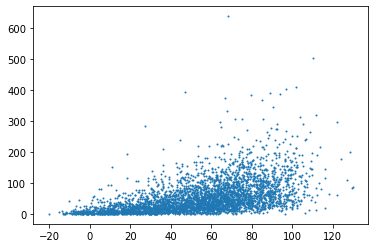

In [232]:
plt.scatter(lin_reg.predict(X_test), y_test, s = 1)

## First attempt at correction: ridge regression

In [233]:
cv_ridge = sklearn.model_selection.RandomizedSearchCV(Ridge(), {'alpha' : list(np.arange(0.01, 1000, 0.1))}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 1000, random_state = 0)

In [234]:
cv_ridge_res = cv_ridge.fit(X_train, y_train)

In [139]:
cv_ridge_res.cv_results_['params'] ##see what got tested

[{'alpha': 587.61},
 {'alpha': 655.51},
 {'alpha': 144.81},
 {'alpha': 335.11},
 {'alpha': 23.110000000000003},
 {'alpha': 120.41000000000001},
 {'alpha': 191.11},
 {'alpha': 964.8100000000001},
 {'alpha': 843.8100000000001},
 {'alpha': 754.11},
 {'alpha': 258.91},
 {'alpha': 97.71000000000001},
 {'alpha': 468.41},
 {'alpha': 381.41},
 {'alpha': 402.31},
 {'alpha': 418.91},
 {'alpha': 924.61},
 {'alpha': 900.4100000000001},
 {'alpha': 464.61},
 {'alpha': 873.01},
 {'alpha': 791.01},
 {'alpha': 374.01},
 {'alpha': 267.51},
 {'alpha': 711.11},
 {'alpha': 242.31},
 {'alpha': 564.21},
 {'alpha': 85.01},
 {'alpha': 89.81000000000002},
 {'alpha': 633.61},
 {'alpha': 247.11},
 {'alpha': 284.91},
 {'alpha': 691.21},
 {'alpha': 733.3100000000001},
 {'alpha': 796.11},
 {'alpha': 538.71},
 {'alpha': 19.410000000000004},
 {'alpha': 854.4100000000001},
 {'alpha': 778.51},
 {'alpha': 676.21},
 {'alpha': 509.41},
 {'alpha': 596.71},
 {'alpha': 949.01},
 {'alpha': 707.21},
 {'alpha': 668.3100000000001

In [141]:
alpha_ridge= cv_ridge_res.best_params_['alpha']
alpha_ridge 

465.71000000000004

In [142]:
ridge_reg = Ridge(fit_intercept = True, alpha = alpha_ridge ).fit(X_train, y_train)
ridge_reg.coef_

array([-3.40700233, -4.79275206,  0.75623068,  8.62698193, -7.00196561,
        7.51316516, -0.51119955,  0.98383624, -0.54077623, -0.12942917,
       -0.82353288,  3.88822715, -0.70660376,  1.03621853,  0.85480895,
       -0.46648646,  0.90272341,  1.38744314,  1.94915162, -0.85326001,
       -1.25484312, -1.24676623, -0.53956671, -0.66210034, -0.89443642,
        1.16230636, -1.32341069,  0.65219523, -0.48859753, -0.95860585,
       -1.42290564, -0.33524043, -0.17376147, -0.02781424,  0.3537971 ,
        0.17535706,  0.6169585 , -0.81128601,  0.51218274, -0.51526387,
        1.17613734,  2.43021847, -2.90095212, -0.72532966,  0.54267591,
       -1.1928568 ,  0.06407969, -0.47999797,  0.13034298,  0.5502042 ,
        1.5731936 , -0.00919291, -0.51853795,  0.80981079,  0.20564954,
       -0.67680219, -0.89789628, -0.38126559])

In [143]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, ridge_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, ridge_reg.predict(X_test)))

training error
2235.5933602706477
testing error
2073.1761069318263


In [197]:
sklearn.metrics.r2_score(y_train, ridge_reg.predict(X_train))

0.2556004920913575

## lasso regression

In [180]:
cv_lasso = sklearn.model_selection.RandomizedSearchCV(Lasso(), {'alpha' : np.arange(0.001, 1, 0.1)}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 1000, random_state = 0)

In [186]:
cv_lasso_res = cv_lasso.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=1000. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5784.273769747466, tolerance: 3729.7450584281946
  model = cd_fast.enet_coordinate_descent(


In [187]:
cv_lasso_res.cv_results_['params'] ##see what got tested
alpha_lasso= cv_lasso_res.best_params_['alpha']
alpha_lasso

0.101

In [194]:
lasso_reg = Lasso(fit_intercept = True, alpha = alpha_lasso).fit(X_train, y_train)
lasso_reg.coef_

array([-3.39625351, -4.82915924,  0.73515195,  8.64192976, -3.62226777,
       11.44632628, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  3.99423501, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  2.07891614, -2.5355234 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.95794911, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

In [195]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, lasso_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, lasso_reg.predict(X_test)))

training error
2237.990907803315
testing error
2074.0493798330212


In [198]:
sklearn.metrics.r2_score(y_train, lasso_reg.predict(X_train))

0.2548021656894178

## random forest

In [358]:
cv_rf = sklearn.model_selection.RandomizedSearchCV(RandomForestRegressor(random_state = 0), 
                                                      {'n_estimators' : range(1,15), 'max_depth' : range(1,10)}, 
                                                      scoring = 'neg_mean_squared_error',
                                                n_iter = 10)

In [359]:
cv_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': range(1, 10),
                                        'n_estimators': range(1, 15)},
                   scoring='neg_mean_squared_error')

In [360]:
cv_rf.cv_results_['params'] ##see what got tested
n_est = cv_rf.best_params_['n_estimators']
max_depth = cv_rf.best_params_['max_depth']
n_est, max_depth

(14, 6)

In [361]:
rf = RandomForestRegressor(n_estimators = n_est, max_depth = max_depth).fit(X_train, y_train)
rf.feature_importances_

array([0.11852686, 0.16008787, 0.06313796, 0.55212289, 0.03261074,
       0.02751098, 0.00040493, 0.        , 0.00085197, 0.        ,
       0.00036171, 0.00122896, 0.00013116, 0.00049534, 0.        ,
       0.00001174, 0.00018477, 0.00017269, 0.0008178 , 0.        ,
       0.        , 0.00105753, 0.00023927, 0.00123126, 0.00041346,
       0.00057166, 0.00200255, 0.00831888, 0.        , 0.00079226,
       0.        , 0.        , 0.00046307, 0.        , 0.00018916,
       0.00004449, 0.00327918, 0.        , 0.00036549, 0.00068115,
       0.00198544, 0.00253079, 0.00039652, 0.00032044, 0.0011102 ,
       0.00054533, 0.00007083, 0.        , 0.        , 0.01119676,
       0.00022343, 0.0005654 , 0.00029573, 0.00061839, 0.00041764,
       0.00141531, 0.        , 0.        ])

In [362]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, rf.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, rf.predict(X_test)))

training error
1988.7013784668663
testing error
1978.803813527458


In [363]:
sklearn.metrics.r2_score(y_train, rf.predict(X_train))

0.3378096599245787

## gradient boosting

In [293]:
cv_gb = sklearn.model_selection.RandomizedSearchCV(GradientBoostingRegressor(random_state = 0), 
                                                      {'n_estimators' : range(1,15), 'max_depth' : range(1,10), 
                                                      'learning_rate' : [0.01, 0.1, 0.5, 1, 2, 3, 5, 10]}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 10, random_state = 0)

In [294]:
cv_gb.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1, 2,
                                                          3, 5, 10],
                                        'max_depth': range(1, 10),
                                        'n_estimators': range(1, 15)},
                   random_state=0, scoring='neg_mean_squared_error')

In [295]:
cv_gb.cv_results_['params'] ##see what got tested
n_est = cv_gb.best_params_['n_estimators']
max_depth = cv_gb.best_params_['max_depth']
learning_rate = cv_gb.best_params_['learning_rate']
n_est, max_depth, learning_rate

(11, 5, 0.1)

In [296]:
gb = GradientBoostingRegressor(n_estimators = n_est, max_depth = max_depth, 
                               learning_rate = learning_rate).fit(X_train, y_train)
gb.feature_importances_

array([0.09600979, 0.14142019, 0.06841878, 0.62012131, 0.01588496,
       0.0450018 , 0.        , 0.00024919, 0.        , 0.        ,
       0.        , 0.00127752, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00246975, 0.        ,
       0.        , 0.        , 0.00136649, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00104096, 0.        , 0.        , 0.00129384,
       0.        , 0.00222566, 0.        , 0.        , 0.        ,
       0.00021358, 0.00013377, 0.00003494, 0.        , 0.00283748,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [297]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, gb.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, gb.predict(X_test)))

training error
2165.7681706191606
testing error
2048.566358048403


In [299]:
sklearn.metrics.r2_score(y_train, gb.predict(X_train))

0.2788506223430872